In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [57]:
data1 = pd.read_csv('purchase_data.csv')  # Change this to your file path
data2 = pd.read_csv('promotion_data.csv')  # Change this to your file path
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

print(data.head())

   customer_id_x  purchase_price  num_items            timestamp day_of_week  \
0            181           62.17         10  2023-01-01 10:29:00      Sunday   
1             20            6.63         10  2023-01-02 13:46:00      Monday   
2             62           76.99          1  2023-01-02 18:59:00      Monday   
3             12           89.32          1  2023-01-03 07:15:00     Tuesday   
4             44           11.84          3  2023-01-03 19:49:00     Tuesday   

   hour_of_day  is_weekend  customer_id_y  promotion_timestamp  clicked  
0           10           1            181  2023-01-14 03:29:00        0  
1           13           0             20  2023-01-08 14:46:00        0  
2           18           0             62  2023-01-19 21:59:00        1  
3            7           0             12  2023-01-03 22:15:00        1  
4           19           0             44  2023-01-22 22:49:00        0  


In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id_x        1000 non-null   int64  
 1   purchase_price       1000 non-null   float64
 2   num_items            1000 non-null   int64  
 3   timestamp            1000 non-null   object 
 4   day_of_week          1000 non-null   object 
 5   hour_of_day          1000 non-null   int64  
 6   is_weekend           1000 non-null   int64  
 7   customer_id_y        1000 non-null   int64  
 8   promotion_timestamp  1000 non-null   object 
 9   clicked              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB
None


In [59]:
print(data.isnull().sum())


customer_id_x          0
purchase_price         0
num_items              0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
customer_id_y          0
promotion_timestamp    0
clicked                0
dtype: int64


In [60]:
data.head()

,customer_id_x,purchase_price,num_items,timestamp,day_of_week,hour_of_day,is_weekend,customer_id_y,promotion_timestamp,clicked
0,181,62.17,10,2023-01-01 10:29:00,Sunday,10,1,181,2023-01-14 03:29:00,0
1,20,6.63,10,2023-01-02 13:46:00,Monday,13,0,20,2023-01-08 14:46:00,0
2,62,76.99,1,2023-01-02 18:59:00,Monday,18,0,62,2023-01-19 21:59:00,1
3,12,89.32,1,2023-01-03 07:15:00,Tuesday,7,0,12,2023-01-03 22:15:00,1
4,44,11.84,3,2023-01-03 19:49:00,Tuesday,19,0,44,2023-01-22 22:49:00,0


In [61]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['promotion_timestamp'] = pd.to_datetime(data['promotion_timestamp'])
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.weekday
data['promotion_month'] = data['promotion_timestamp'].dt.month
data['promotion_day_of_week'] = data['promotion_timestamp'].dt.weekday

In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id_x          1000 non-null   int64         
 1   purchase_price         1000 non-null   float64       
 2   num_items              1000 non-null   int64         
 3   timestamp              1000 non-null   datetime64[ns]
 4   day_of_week            1000 non-null   int32         
 5   hour_of_day            1000 non-null   int64         
 6   is_weekend             1000 non-null   int64         
 7   customer_id_y          1000 non-null   int64         
 8   promotion_timestamp    1000 non-null   datetime64[ns]
 9   clicked                1000 non-null   int64         
 10  month                  1000 non-null   int32         
 11  promotion_month        1000 non-null   int32         
 12  promotion_day_of_week  1000 non-null   int32         
dtypes: d

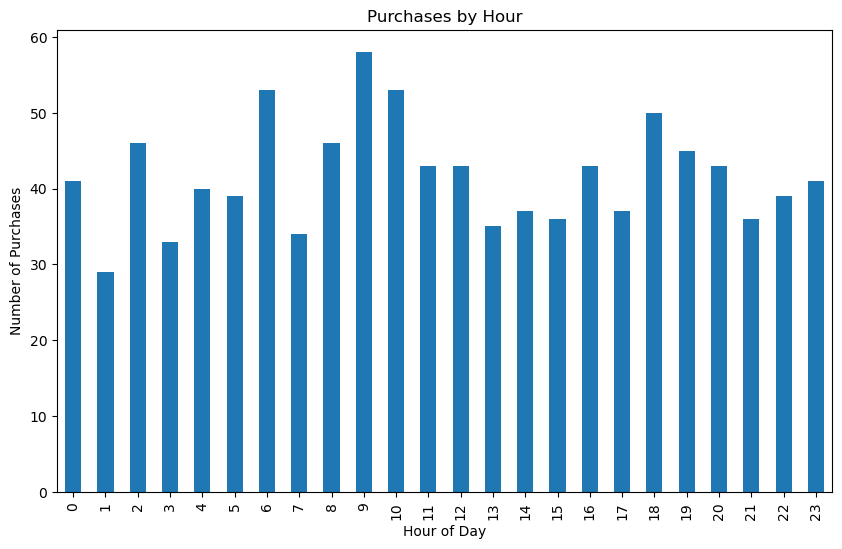

In [63]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


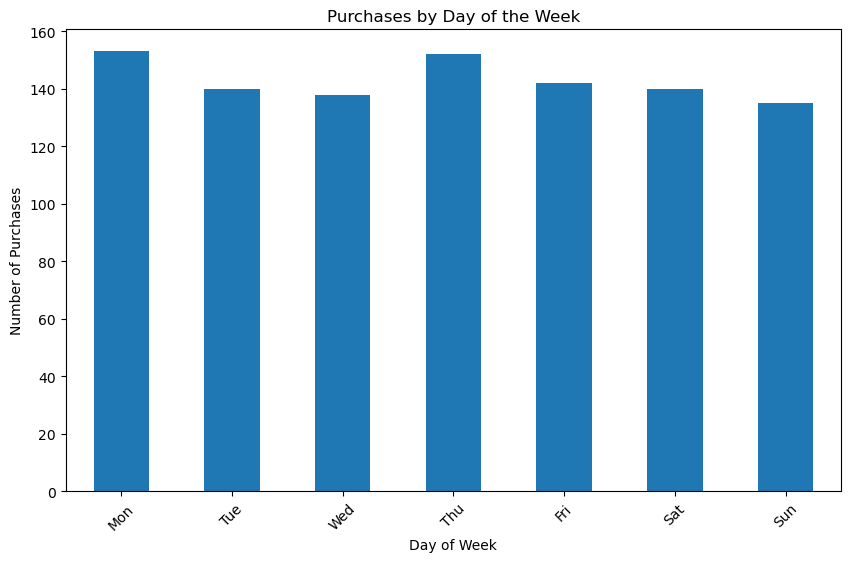

In [64]:
# Plot purchases by day of the week
purchase_by_day = data.groupby('day_of_week').size()

plt.figure(figsize=(10, 6))
purchase_by_day.plot(kind='bar')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


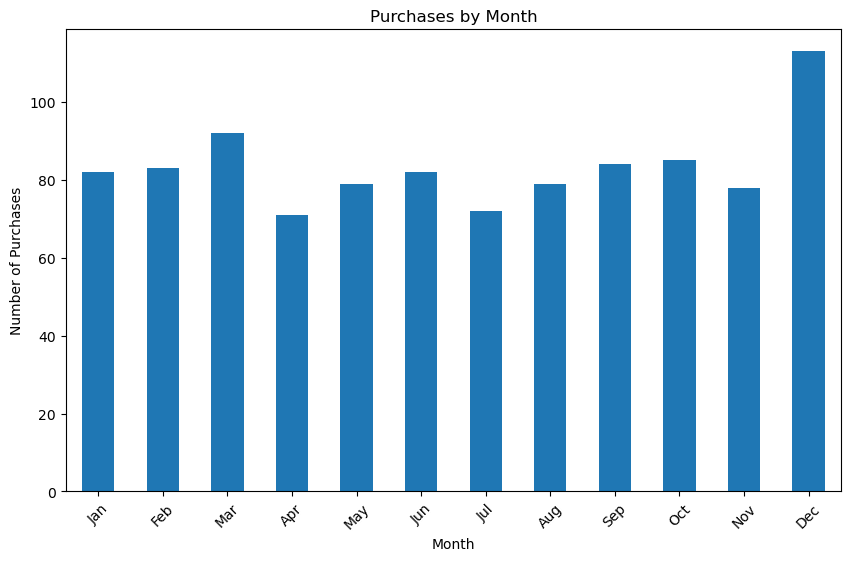

In [65]:
# Plot purchases by month
purchase_by_month = data.groupby('month').size()

plt.figure(figsize=(10, 6))
purchase_by_month.plot(kind='bar')
plt.title('Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


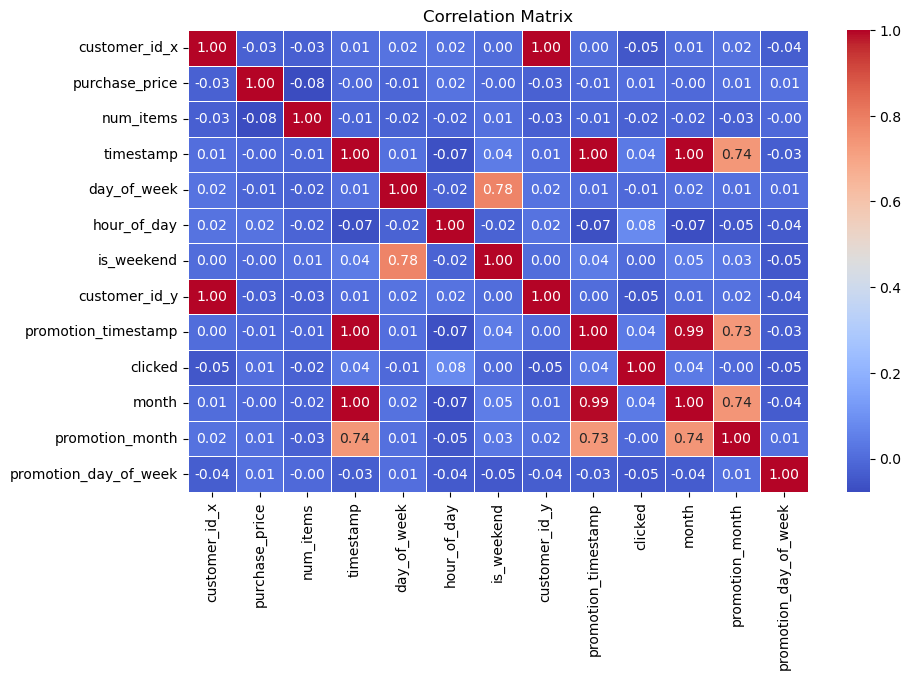

In [66]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


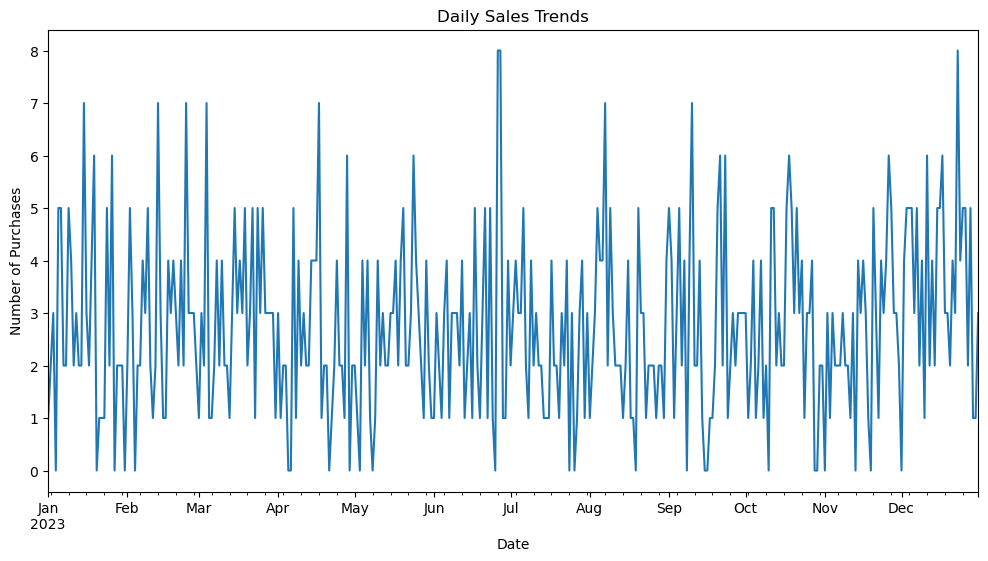

In [67]:
# Aggregate data by time (e.g., daily sales count)
daily_sales = data.resample('D', on='timestamp').size()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


# Feature Engieerning


In [68]:
# Calculate time difference base on hours
data['promotion_diff_hours'] = (data['timestamp'] - data['promotion_timestamp']).dt.total_seconds() / 3600

# check the new feature
print(data[['promotion_timestamp', 'timestamp', 'promotion_diff_hours']].head())


  promotion_timestamp           timestamp  promotion_diff_hours
0 2023-01-14 03:29:00 2023-01-01 10:29:00                -305.0
1 2023-01-08 14:46:00 2023-01-02 13:46:00                -145.0
2 2023-01-19 21:59:00 2023-01-02 18:59:00                -411.0
3 2023-01-03 22:15:00 2023-01-03 07:15:00                 -15.0
4 2023-01-22 22:49:00 2023-01-03 19:49:00                -459.0


In [69]:
# take timestamp relatated feature
data['purchase_year'] = data['timestamp'].dt.year
data['purchase_month'] = data['timestamp'].dt.month
data['purchase_day'] = data['timestamp'].dt.day
data['purchase_hour'] = data['timestamp'].dt.hour
data['purchase_minute'] = data['timestamp'].dt.minute

# analysis is weenkend 
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# analysis is work day 
data['is_workday'] = 1 - data['is_weekend']

# take quarter
data['purchase_quarter'] = data['timestamp'].dt.quarter


In [70]:
# is peak hour or not
def is_peak_hour(hour):
    if 8 <= hour < 11 or 17 <= hour < 20:
        return 1
    return 0

data['is_peak_hour'] = data['purchase_hour'].apply(is_peak_hour)


In [71]:
# total amount
data['purchase_amount'] = data['purchase_price'] * data['num_items']

# split in range
bins = [0, 20, 50, 100, 200, 500, np.inf]
labels = ['0-20', '20-50', '50-100', '100-200', '200-500', '500+']
data['purchase_amount_range'] = pd.cut(data['purchase_amount'], bins=bins, labels=labels)



In [72]:
# customer purchase count
data['customer_purchase_count'] = data.groupby('customer_id_x')['purchase_amount'].transform('count')

# customer purchase total amount
data['customer_total_purchase'] = data.groupby('customer_id_x')['purchase_amount'].transform('sum')

# customer purchase average amount
data['customer_avg_purchase'] = data.groupby('customer_id_x')['purchase_amount'].transform('mean')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id_x            1000 non-null   int64         
 1   purchase_price           1000 non-null   float64       
 2   num_items                1000 non-null   int64         
 3   timestamp                1000 non-null   datetime64[ns]
 4   day_of_week              1000 non-null   int32         
 5   hour_of_day              1000 non-null   int64         
 6   is_weekend               1000 non-null   int64         
 7   customer_id_y            1000 non-null   int64         
 8   promotion_timestamp      1000 non-null   datetime64[ns]
 9   clicked                  1000 non-null   int64         
 10  month                    1000 non-null   int32         
 11  promotion_month          1000 non-null   int32         
 12  promotion_day_of_week    1000 non-n

In [74]:
data.drop(['timestamp', 'promotion_timestamp', 'customer_id_y'], axis=1, inplace=True)


In [75]:
data = pd.get_dummies(data, columns=['purchase_amount_range'], drop_first=True)


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id_x                  1000 non-null   int64  
 1   purchase_price                 1000 non-null   float64
 2   num_items                      1000 non-null   int64  
 3   day_of_week                    1000 non-null   int32  
 4   hour_of_day                    1000 non-null   int64  
 5   is_weekend                     1000 non-null   int64  
 6   clicked                        1000 non-null   int64  
 7   month                          1000 non-null   int32  
 8   promotion_month                1000 non-null   int32  
 9   promotion_day_of_week          1000 non-null   int32  
 10  promotion_diff_hours           1000 non-null   float64
 11  purchase_year                  1000 non-null   int32  
 12  purchase_month                 1000 non-null   in

In [77]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numeric_features = ['promotion_diff_hours', 'purchase_amount', 'customer_purchase_count', 'customer_total_purchase', 'customer_avg_purchase']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [78]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['clicked'], axis=1)  # Exclude the target column
y = data['clicked']  # Target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.58      0.52        99
           1       0.48      0.39      0.43       101

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[57 42]
 [62 39]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.ensemble import RandomForestClassifier

# train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# prediction
y_pred_rf = rf_model.predict(X_test)

# modeling
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55        99
           1       0.51      0.39      0.44       101

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200

Confusion Matrix:
 [[61 38]
 [62 39]]


In [81]:
from xgboost import XGBClassifier

#  XGBoost 
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb_model.predict(X_test)

# modeling
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.61      0.57        99
           1       0.55      0.48      0.51       101

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion Matrix:
 [[60 39]
 [53 48]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:41:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [82]:
from sklearn.svm import SVC

# SVm
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# prediction
y_pred_svm = svm_model.predict(X_test)

# modeling
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66        99
           1       0.00      0.00      0.00       101

    accuracy                           0.49       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.49      0.33       200

Confusion Matrix:
 [[ 99   0]
 [101   0]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.neighbors import KNeighborsClassifier

#  KNN 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# prediction
y_pred_knn = knn_model.predict(X_test)

# modeling
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.55      0.50        99
           1       0.44      0.36      0.40       101

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

Confusion Matrix:
 [[54 45]
 [65 36]]


In [84]:
from sklearn.neural_network import MLPClassifier

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# preidction
y_pred_mlp = mlp_model.predict(X_test)

# modeling
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.50      0.99      0.67       101

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.34       200

Confusion Matrix:
 [[  0  99]
 [  1 100]]


In [85]:
# Accuracies table
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'MLP']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_mlp)
]

# print
for model, acc in zip(models, accuracies):
    print(f"{model}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.4800
Random Forest: Accuracy = 0.5000
XGBoost: Accuracy = 0.5400
SVM: Accuracy = 0.4950
KNN: Accuracy = 0.4500
MLP: Accuracy = 0.5000
